**Занятие 4. Кластеризация, обучение без учителя.**

---



Обучение без учителя (unsupervised learning, неконтролируемое обучение) – класс методов машинного обучения для поиска шаблонов в наборе данных. Данные, получаемые на вход таких алгоритмов обычно не размечены, то есть передаются только входные переменные X без соответствующих меток y. Если в контролируемом обучении (обучении с учителем, supervised learning) система пытается извлечь уроки из предыдущих примеров, то в обучении без учителя – система старается самостоятельно найти шаблоны непосредственно из приведенного примера.

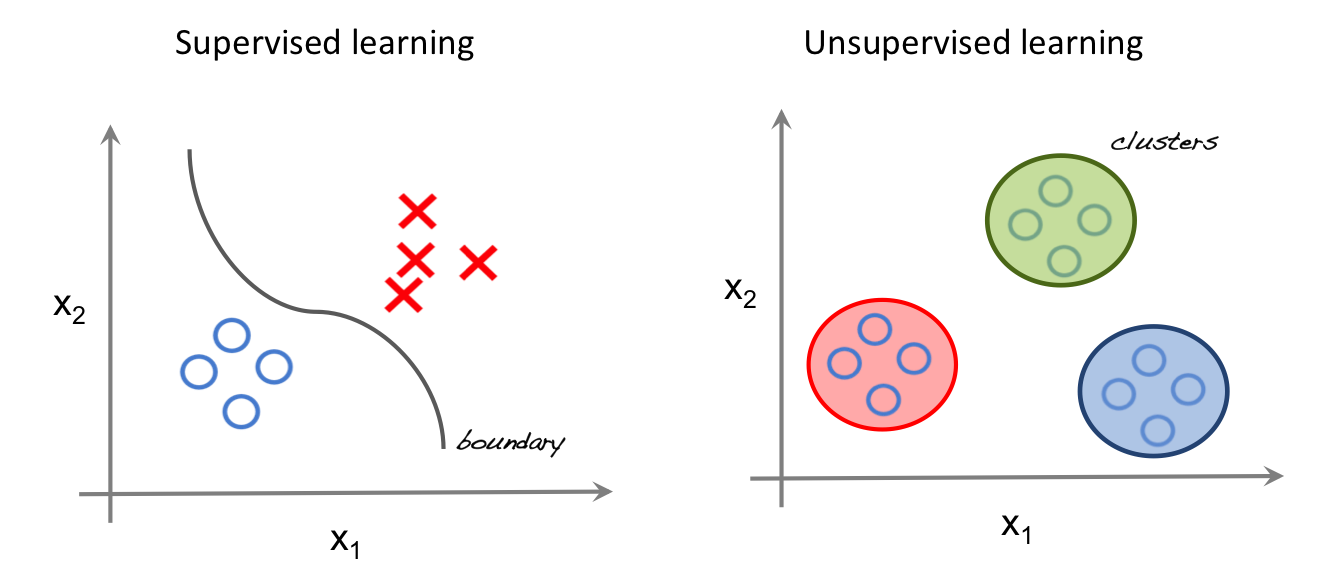

На левой части изображения представлен пример контролируемого обучения: здесь для того, чтобы найти лучшую функцию, соответствующую представленным точкам, используется метод регрессии. В то же время при неконтролируемом обучении входные данные разделяются на основе представленных характеристик, а предсказание свойств основывается на том, какому кластеру принадлежит пример.

Методы кластеризации данных являются одним из наиболее популярных семейств машинного обучения без учителя. Рассмотрим некоторые из них подробнее.

**Важная терминология**

Feature (Особенности): входная переменная, используемая для создания прогнозов.

Predictions (Прогнозы): выходные данные модели при наличии входного примера.

Example (Пример): строка набора данных. Пример обычно содержит один или несколько объектов.

Label (Метки): результат функции.

Для составления прогнозов воспользуемся классическим набором данных ирисов Фишера. Датасет представляет набор из 150 записей с пятью атрибутами в следующем порядке: длина чашелистика (sepal length), ширина чашелистика (sepal width), длина лепестка (petal length), ширина лепестка (petal width) и класс, соответствующий одному из трех видов: Iris Setosa, Iris Versicolor или Iris Virginica, обозначенных соответственно 0, 1, 2. Наш алгоритм должен принимать четыре свойства одного конкретного цветка и предсказывать, к какому классу (виду ириса) он принадлежит. Имеющиеся в наборе данных метки можно использовать для оценки качества предсказания.

Для решения задач кластеризации данных в этой статье мы используем Python, библиотеку scikit-learn для загрузки и обработки набора данных и matplotlib для визуализации. Ниже представлен программный код для исследования исходного набора данных.

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


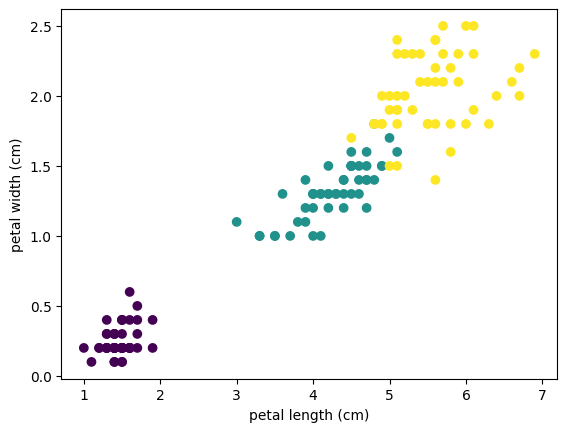

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Загружаем набор данных
iris_df = datasets.load_iris()

# Методы, доступные для набора данных
print(dir(iris_df))

# Признаки
print(iris_df.feature_names)

# Метки
print(iris_df.target)

# Имена меток
print(iris_df.target_names)

# Разделение набора данных
x_axis = iris_df.data[:, 2]  # Sepal Length
y_axis = iris_df.data[:, 3]  # Sepal Width

# Построение
plt.xlabel(iris_df.feature_names[2])
plt.ylabel(iris_df.feature_names[3])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

На диаграмме фиолетовым цветом обозначен вид Setosa, зеленым – Versicolor и желтым – Virginica. При построении были взяты лишь два признака. Вы можете проанализировать как разделяются классы при других комбинациях параметров.

Цель кластеризации данных состоит в том, чтобы выделить группы примеров с похожими чертами и определить соответствие примеров и кластеров. При этом исходно у нас нет примеров такого разбиения. Это аналогично тому, как если бы в приведенном наборе данных у нас не было меток, как на рисунке ниже.

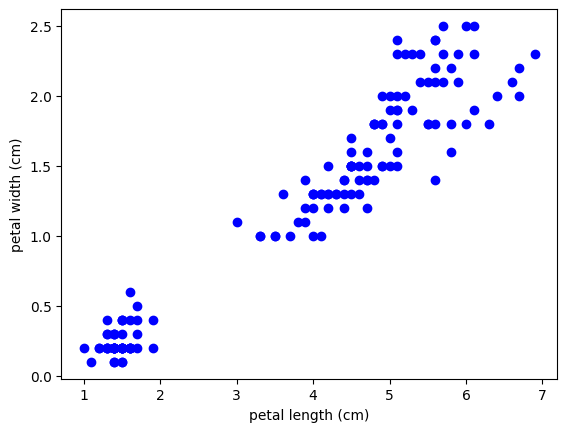

In [ ]:
plt.xlabel(iris_df.feature_names[2])
plt.ylabel(iris_df.feature_names[3])
plt.scatter(x_axis, y_axis, c='blue')
plt.show()

Наша задача – используя все имеющиеся данные, предсказать соответствие объектов выборки их классам, сформировав таким образом кластеры.

Метод k-средних
Наиболее популярным алгоритмом кластеризации данных является метод k-средних. Это итеративный алгоритм кластеризации, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

Первоначально выбирается желаемое количество кластеров. Поскольку нам известно, что в нашем наборе данных есть 3 класса, установим параметр модели n_clusters равный трем.

Теперь случайным образом из входных данных выбираются три элемента выборки, в соответствие которым ставятся три кластера, в каждый из которых теперь включено по одной точке, каждая при этом является центроидом этого кластера.

Далее ищем ближайшего соседа текущего центроида. Добавляем точку к соответствующему кластеру и пересчитываем положение центроида с учетом координат новых точек.  Алгоритм заканчивает работу, когда координаты каждого центроида перестают меняться. Центроид каждого кластера в результате представляет собой набор значений признаков, описывающих усредненные параметры выделенных классов.

In [ ]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

# Загружаем набор данных
iris_df = datasets.load_iris()

# Описываем модель
model = KMeans(n_clusters=3)

# Проводим моделирование
model.fit(iris_df.data)

# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Предсказание на всем наборе данных
all_predictions = model.predict(iris_df.data)

# Выводим предсказания
print(predicted_label)
print(all_predictions)

[0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


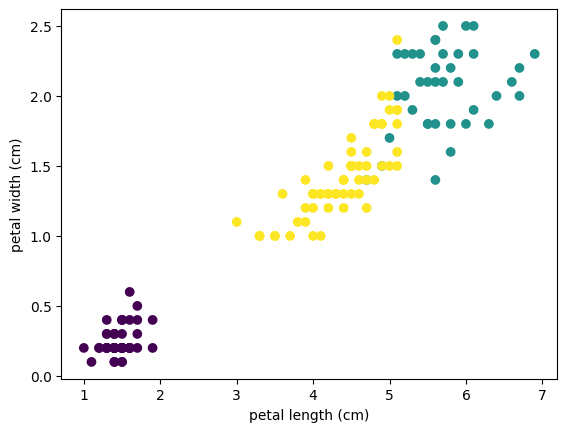

In [ ]:
plt.xlabel(iris_df.feature_names[2])
plt.ylabel(iris_df.feature_names[3])
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

При выводе данных нужно понимать, что алгоритм не знает ничего о нумерации классов, и числа 0, 1, 2 – это лишь номера кластеров, определенных в результате работы алгоритма. Так как исходные точки выбираются случайным образом, вывод будет несколько меняться от одного запуска к другому.

Характерной особенностью набора данных ирисов Фишера является то, что один класс (Setosa) легко отделяется от двух остальных. Это заметно и в приведенном примере.

**Метод кластеризации на основе плотности DBSCAN**


DBSCAN (Density-Based Spatial Clustering of Applications with Noise, плотностной алгоритм пространственной кластеризации с присутствием шума) – популярный алгоритм кластеризации, используемый в анализе данных в качестве одной из замен метода k-средних.

Метод не требует предварительных предположений о числе кластеров, но нужно настроить два других параметра: eps и min_samples. Данные параметры – это соответственно максимальное расстояние между соседними точками и минимальное число точек в окрестности (количество соседей), когда можно говорить, что эти экземпляры данных образуют один кластер. В scikit-learn есть соответствующие значения параметров по умолчанию, но, как правило, их приходится настраивать самостоятельно.

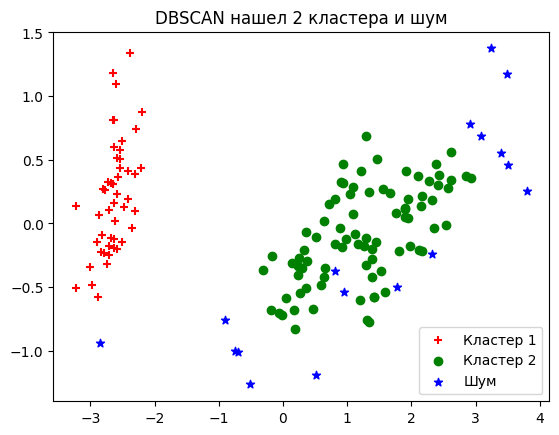

In [ ]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Загружаем датасет
iris = load_iris()

# Определяем модель
dbscan = DBSCAN()

# Обучаем
dbscan.fit(iris.data)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

In [ ]:
import pandas as pd


In [ ]:
pd.DataFrame(data = iris.data)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Понижение размерности с методом t-SNE**


Метод t-SNE (t-distributed stochastic neighbor embedding) представляет собой один из методов обучения без учителя, используемых для визуализации, например, отображения пространства высокой размерности в двух- или трехмерное пространство. t-SNE расшифровывается как распределенное стохастическое соседнее вложение.

Метод моделирует каждый объект пространства высокой размерности в двух- или трехкоординатную точку таким образом, что близкие по характеристикам элементы данных в многомерном пространстве (например, датасете с большим числом столбцов) проецируются в соседние точки, а разнородные объекты с большей вероятностью моделируются точками, далеко отстоящими друг от друга.

Вернемся к примеру с ирисами и посмотрим, как произвести моделирование по этому методу при помощи библиотеки sklearn.

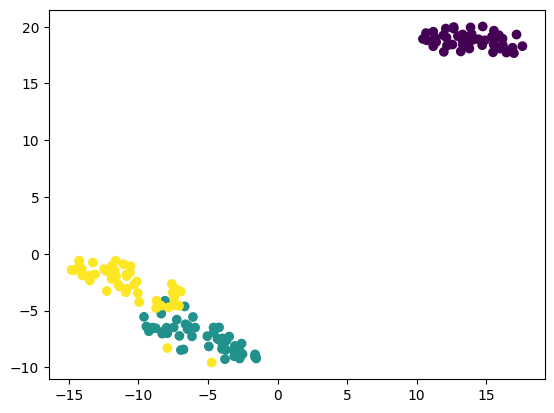

In [ ]:
# Импорт библиотек
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Загрузка датасета
iris_df = datasets.load_iris()

# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(iris_df.data)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

В этом случае каждый экземпляр представлен четырьмя координатами – таким образом, при отображении признаков на плоскость размерность пространства понижается с четырех до двух.

**Практика**

In [ ]:
from google.colab import drive # Интеграция с гугл-диском
drive.mount('/content/gdrive')

Mounted at /content/gdrive


https://drive.google.com/file/d/1ukureibHDrTg91vXfnMCIGFwuXqZSva2/view?usp=share_link

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import random

std_figure_size = (8,5)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

fixed_random_state = random.seed(42)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Dataset/wine-clustering.csv')

In [ ]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
def draw_corr_matrix(df: pd.DataFrame, shape: int): # df-ваш датафрейм, shape - размер матрицы
    df = df.corr().copy()
    plt.rcParams["figure.figsize"] = shape,shape
    plt.imshow(df, cmap ='viridis')


    plt.colorbar()

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            text = plt.text(j, i, round(float(df.iloc[i, j]),2),
                        ha="center", va="center", color="r")

    plt.xticks(range(len(df)), df.columns, rotation = 45)


    plt.yticks(range(len(df)), df.index)

    plt.show()

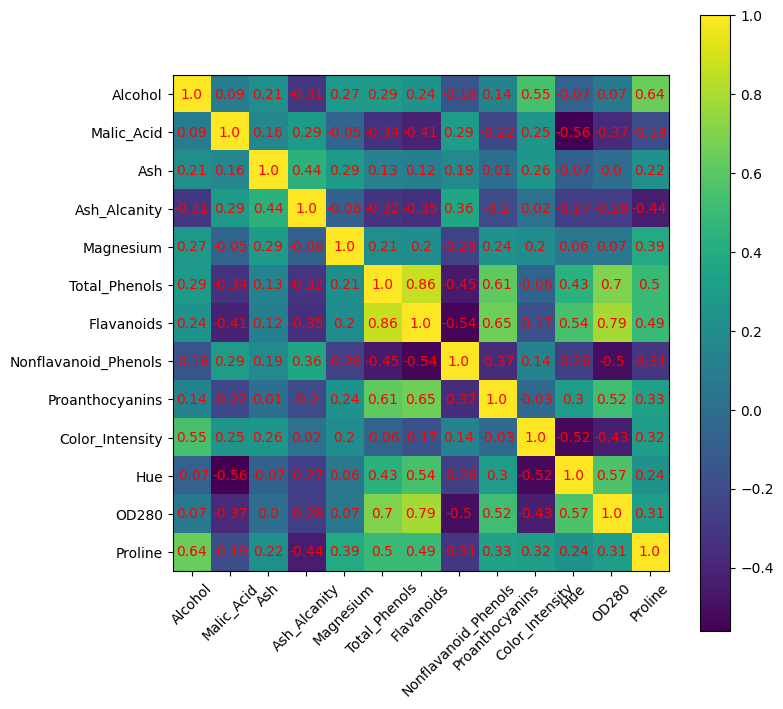

In [ ]:
draw_corr_matrix(df, 8)

In [ ]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [ ]:
cols_cleaned = []

for col in df.columns:
    cols_cleaned.append(col.strip().lower())

df.columns = cols_cleaned

In [ ]:
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


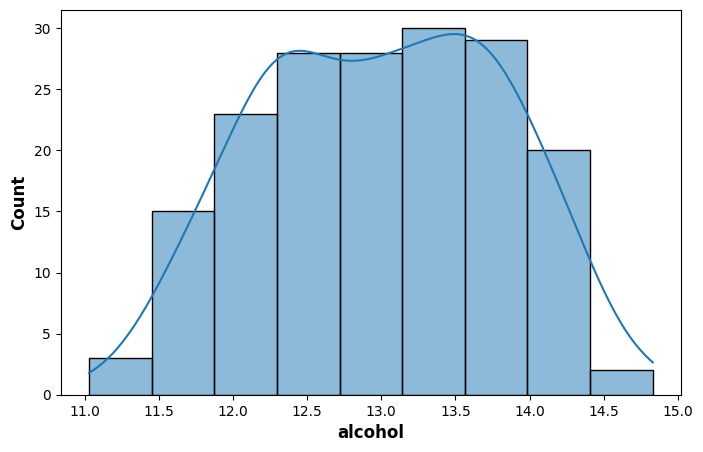

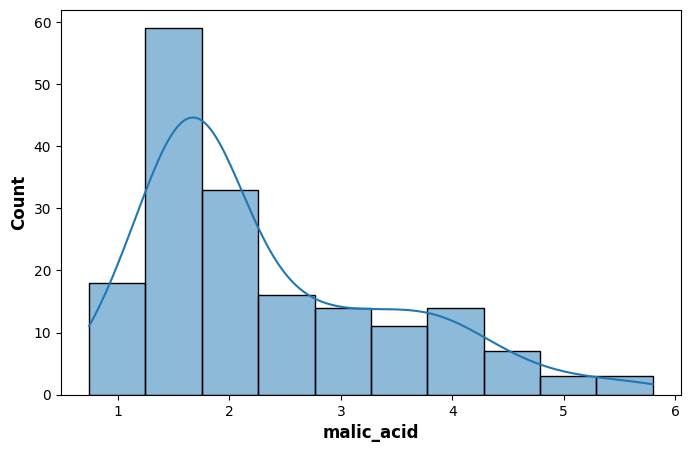

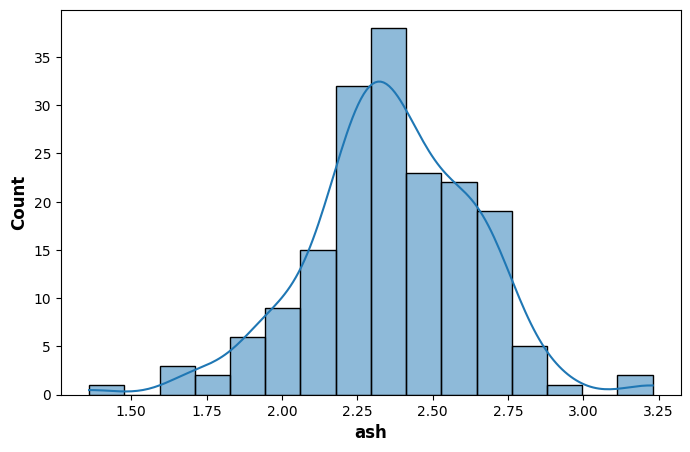

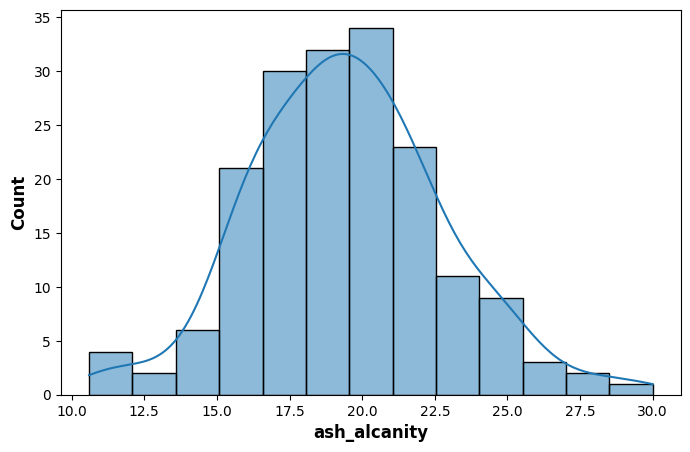

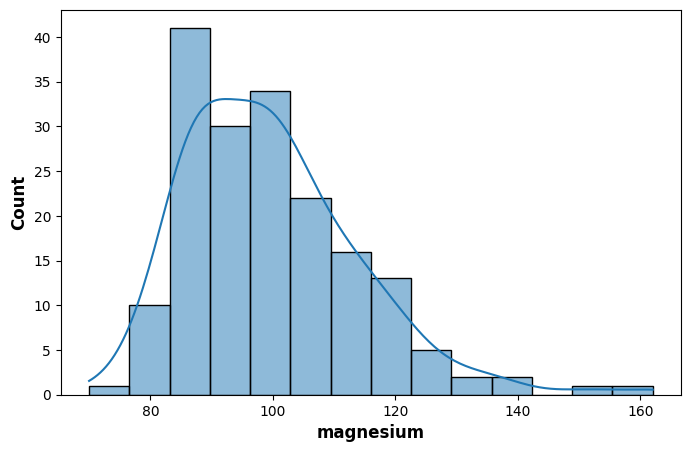

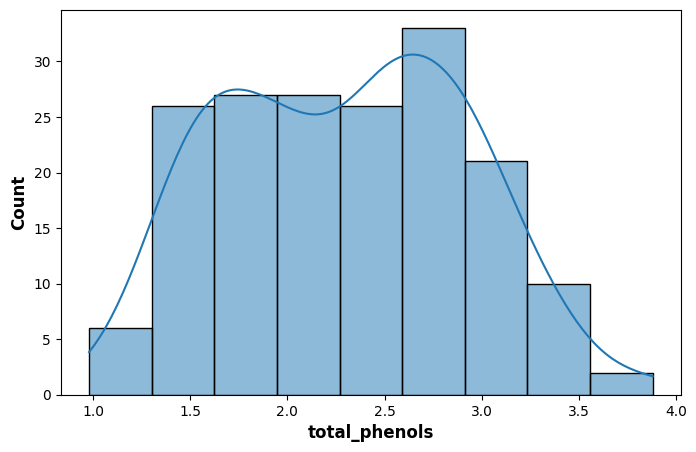

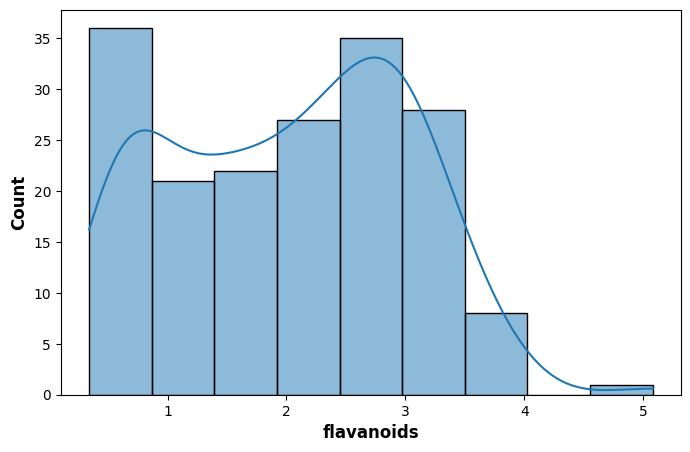

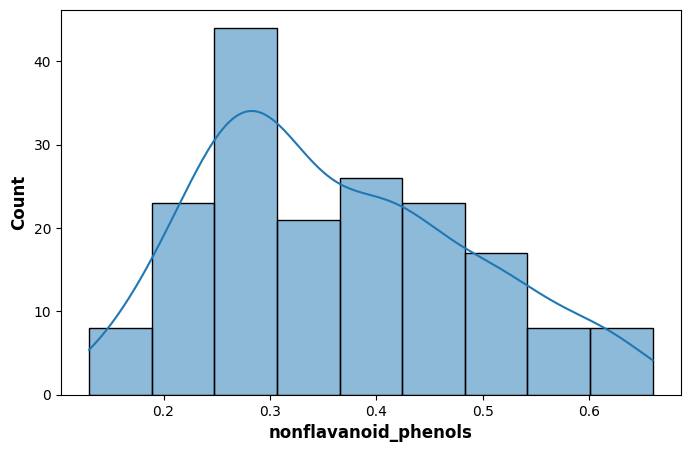

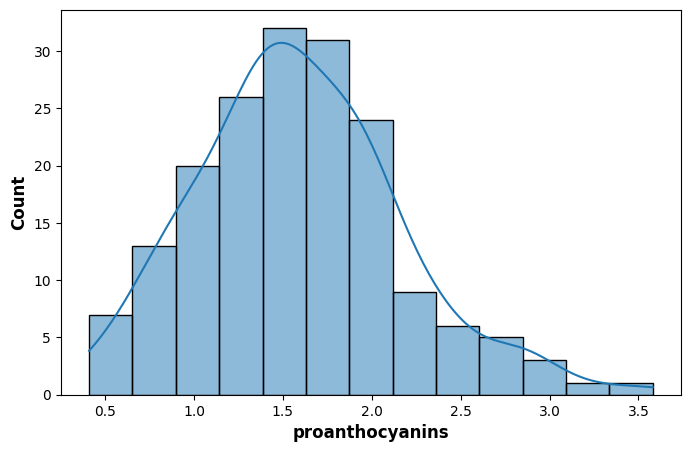

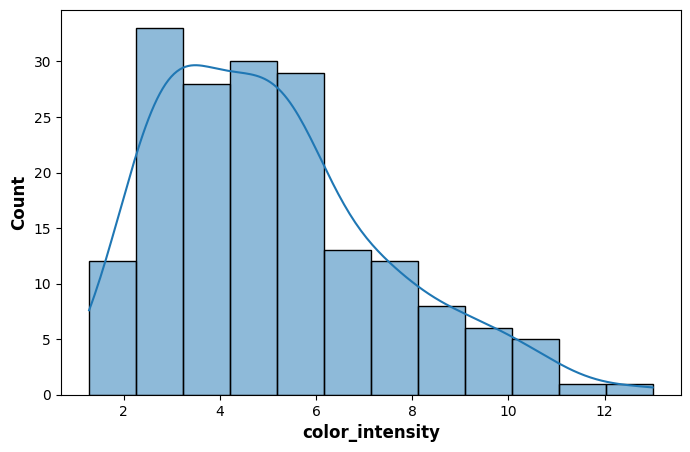

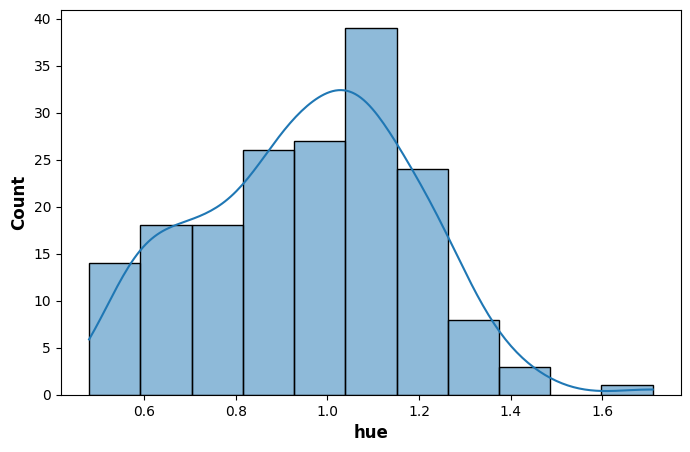

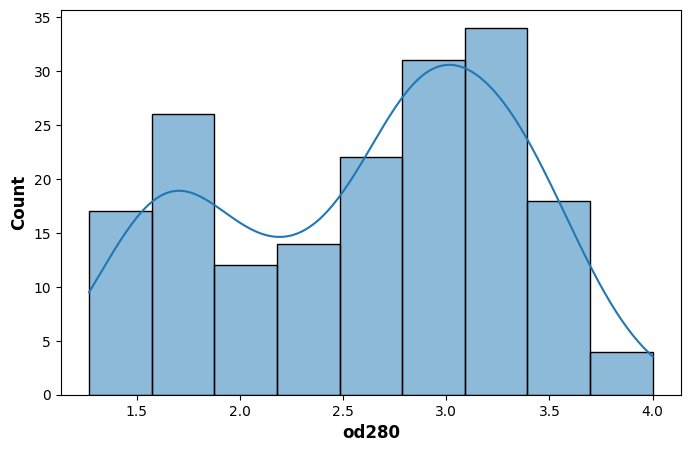

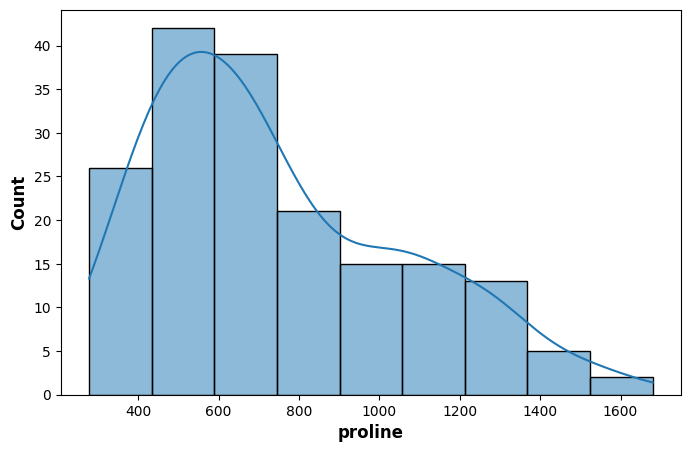

In [ ]:
for col in df.columns:
    fig, axs = plt.subplots(figsize=std_figure_size)
    sns.histplot(data = df, x=col, kde = True, ax=axs)
    plt.show()

In [ ]:
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X = StandardScaler().fit_transform(df)

In [ ]:
X

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.552972,-0.702436,0.233769,-1.224710,1.378174,0.796708,1.043661,-0.729831,1.093141,0.235133,0.363665,2.262034,0.793386
1,0.247472,-0.610198,-0.809540,-2.696922,0.018056,0.562211,0.738364,-0.926936,-0.578400,-0.317844,0.407900,1.278188,0.762788
2,0.197645,0.021031,1.141607,-0.272253,0.086325,0.796708,1.227314,-0.539574,1.802679,0.250223,0.319467,0.875251,1.022728
3,1.732995,-0.400457,0.495037,-0.837478,0.767296,2.405004,1.482916,-1.130495,0.934182,0.921471,-0.425517,1.368576,1.500126
4,0.297382,0.207225,1.919073,0.442690,1.001563,0.796708,0.667285,0.218295,0.383679,-0.348242,0.363665,0.479405,-0.038337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.889164,1.478132,0.308070,0.297489,-0.361719,-1.003554,-1.409522,1.079393,-1.022032,0.894074,-1.375372,-1.066221,-0.022107
174,0.497794,0.920057,0.420051,1.009293,0.152237,-0.805425,-1.271520,0.504706,-0.328877,0.781085,-1.117489,-1.259026,0.009862
175,0.334867,1.061628,-0.384788,0.150518,1.089733,-1.152751,-1.330685,0.504706,-0.442779,1.501112,-1.589724,-1.259026,0.258402
176,0.210094,0.207225,0.012738,0.150518,1.089733,-1.053231,-1.340543,1.138780,-0.235708,1.298890,-1.546891,-1.195497,0.271913


In [ ]:
X = PowerTransformer(standardize=False).fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=df.columns)

In [ ]:
X.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.552972,-0.702436,0.233769,-1.224710,1.378174,0.796708,1.043661,-0.729831,1.093141,0.235133,0.363665,2.262034,0.793386
1,0.247472,-0.610198,-0.809540,-2.696922,0.018056,0.562211,0.738364,-0.926936,-0.578400,-0.317844,0.407900,1.278188,0.762788
2,0.197645,0.021031,1.141607,-0.272253,0.086325,0.796708,1.227314,-0.539574,1.802679,0.250223,0.319467,0.875251,1.022728
3,1.732995,-0.400457,0.495037,-0.837478,0.767296,2.405004,1.482916,-1.130495,0.934182,0.921471,-0.425517,1.368576,1.500126
4,0.297382,0.207225,1.919073,0.442690,1.001563,0.796708,0.667285,0.218295,0.383679,-0.348242,0.363665,0.479405,-0.038337


In [ ]:
len(X.columns)

13

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
labels_1 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X)

In [ ]:
labels_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
reducer_1 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_1 = reducer_1.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


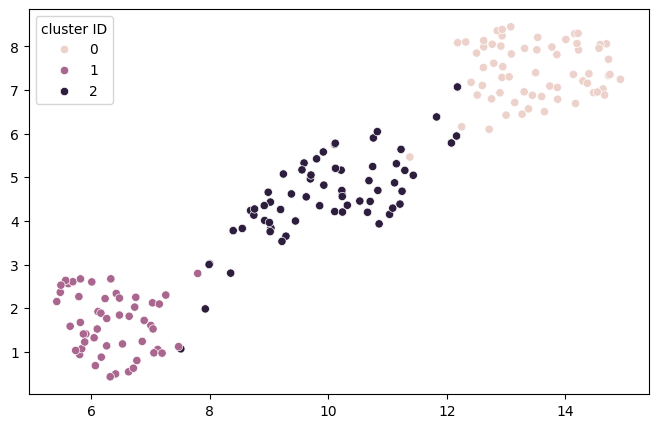

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.legend(title="cluster ID")
plt.show()

In [ ]:
pca_2 = PCA(n_components = 2, random_state=fixed_random_state).fit_transform(X)

<ipython-input-40-939f28b221dd>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="PCA")


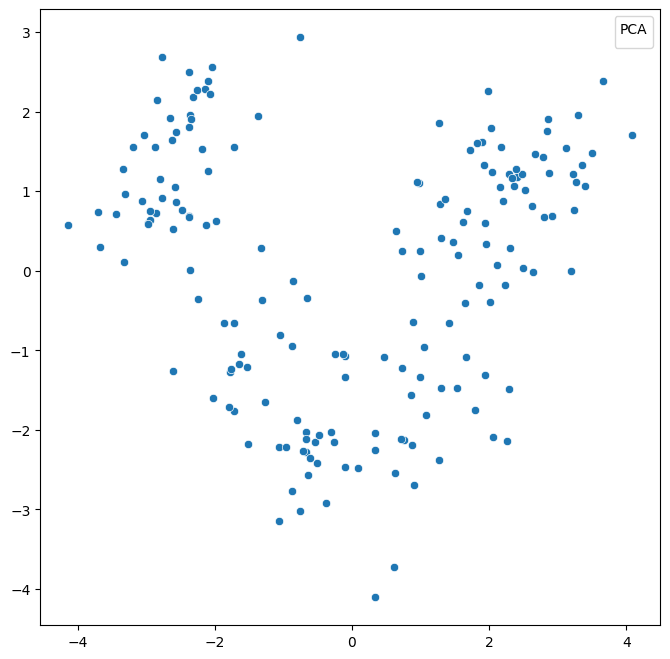

In [ ]:
sns.scatterplot(x=pca_2[:, 0], y=pca_2[:, 1])
plt.legend(title="PCA")
plt.show()

In [ ]:
labels_2 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(pca_2)

In [ ]:
labels_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

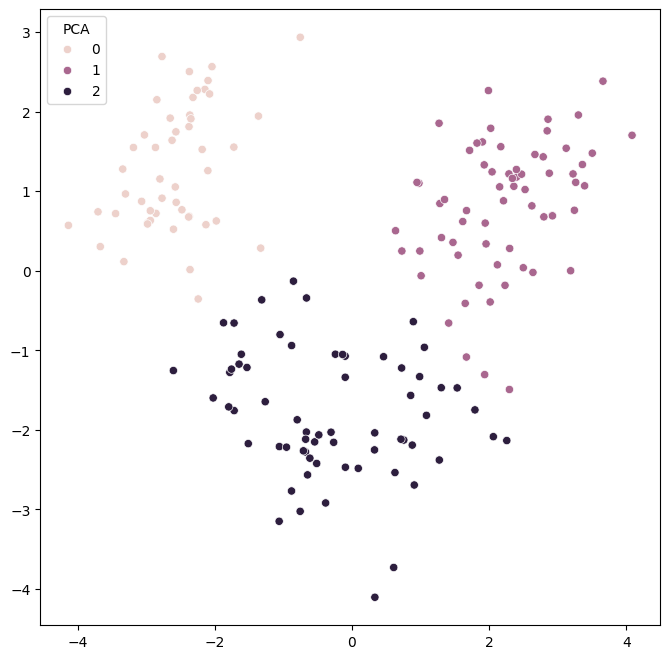

In [ ]:
sns.scatterplot(x=pca_2[:, 0], y=pca_2[:, 1], hue=labels_2)
plt.legend(title="PCA")
plt.show()

In [ ]:
labels_3 = KMeans(n_clusters=4, random_state=fixed_random_state).fit_predict(pca_2)

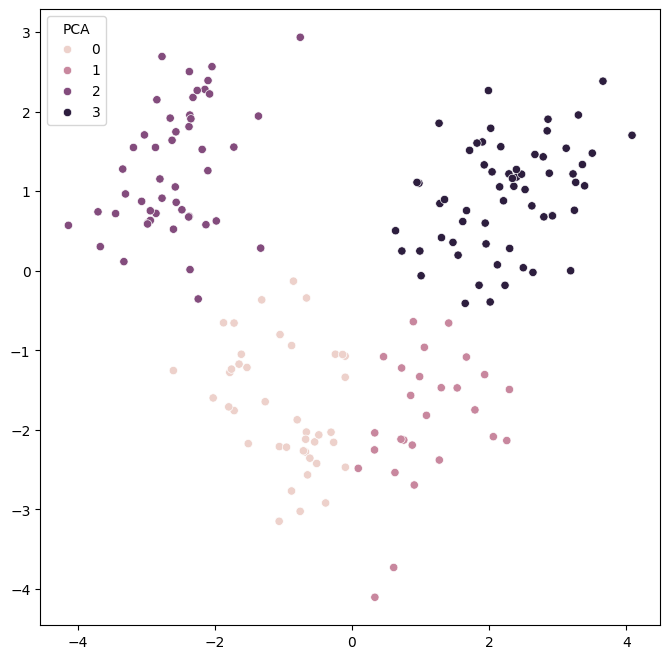

In [ ]:
sns.scatterplot(x=pca_2[:, 0], y=pca_2[:, 1], hue=labels_3)
plt.legend(title="PCA")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=fixed_random_state)
labels_4 = kmeans.fit_predict(pca_2)

In [ ]:
labels_4

array([3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 0, 4, 1,
       0, 0, 4, 0, 4, 0, 4, 1, 0, 4, 0, 4, 0, 0, 0, 0, 4, 2, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 1, 4, 0, 0, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0,
       0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 1, 4, 4, 0, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
centers

array([[ 1.07535327, -1.9774955 ],
       [ 1.56230796,  0.24290488],
       [-2.57883164,  1.28350531],
       [ 2.6499334 ,  1.31712088],
       [-0.98234755, -1.69701435]])

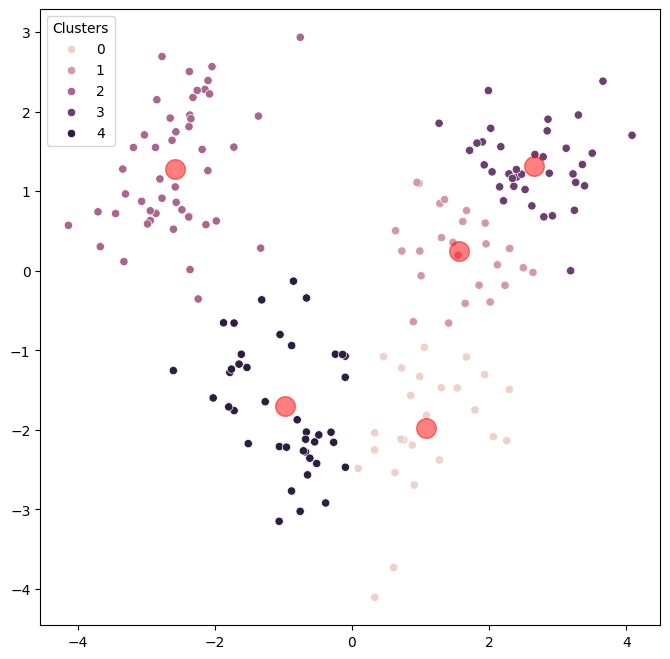

In [ ]:
sns.scatterplot(x=pca_2[:, 0], y=pca_2[:, 1], hue=labels_4)
plt.legend(title="Clusters")
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()